In [1]:

import os
import sys
import importlib
import numpy as np
import shutil
import tensorflow as tf
from timeit import default_timer as timer
if '__file__' in locals():
    dir_path = os.path.dirname(os.path.realpath(__file__))
else:
    dir_path = os.getcwd()
python_path = dir_path + '/../python/'
sys.path.append(python_path)



import dataset_loader
importlib.reload(dataset_loader)
from dataset_loader import EM_DATA_REAL_SYTH, EM_DATA,EM_DATA_DISC_RANDOM
from dataset_loader import BATCH_SIZE, NBOX_IN,NBOX_OUT,N_CHANNELS
from dataset_loader import getbox
import net_3d_1
import utils
from utils import get_available_gpus

In [2]:
python_path

'/Users/markroza/Documents/GitHub/work_from_home/NNproject/code/jupyter/../python/'

In [3]:
#define folders
base_data_folder = "/Users/markroza/Documents/work_from_home/NNcourse_project/data/"
data_fld = base_data_folder + "/res6/synth_exp/"
out_fld = base_data_folder + "/results/disc_exp/"


model_path = out_fld+'/network_test/'
graph_folder = out_fld+'/graphs/'
test_res_folder = out_fld + '/tests/'

if os.path.isdir(out_fld):
    shutil.rmtree(out_fld, ignore_errors=True)

os.mkdir(out_fld)
os.mkdir(model_path)
os.mkdir(graph_folder)
os.mkdir(test_res_folder)



syn_data_pairs = dataset_loader.read_list_file(data_fld+'list_synth.txt')
syn_pdbs = [x[0] for x in  syn_data_pairs]
real_data_pairs = dataset_loader.read_list_file(data_fld+'list_real.txt')
real_pdbs = [x[0] for x in  real_data_pairs]

all_data = EM_DATA_REAL_SYTH(data_fld,real_pdbs = real_pdbs[:4],synth_pdbs =syn_pdbs[:4], is_random = False)


6nt8 Loaded
5fik Loaded
/Users/markroza/Documents/work_from_home/NNcourse_project/data//res6/synth_exp//F_5flc_output.npy
5flc FAILED, Error : 
4uer Loaded
5vhh Loaded
4uif Loaded
4uer Loaded
6bf7 Loaded
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.


False


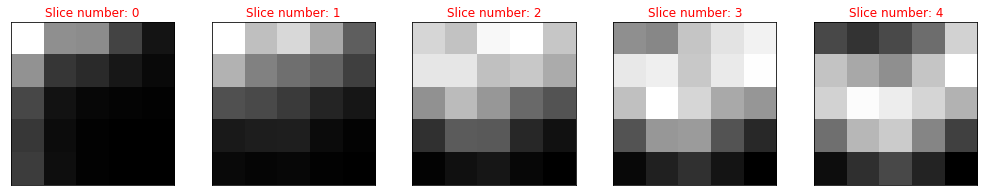

In [7]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


fig, ax = plt.subplots(1, 5, figsize=[18, 3])
n = 0
slice = 0
p = all_data.train_points[1655900]
map_patch = getbox(p.out,p.ijk[0],p.ijk[1],p.ijk[2],NBOX_OUT)
std = np.std(map_patch)
avg = np.mean(map_patch)
map_patch = (map_patch-avg)/std

print(p.is_real)

for _ in range(5):
    ax[n].imshow(map_patch[:, :, slice,0]+10, 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='r')
    n += 1
    slice += 1
   
fig.subplots_adjust(wspace=0, hspace=0)


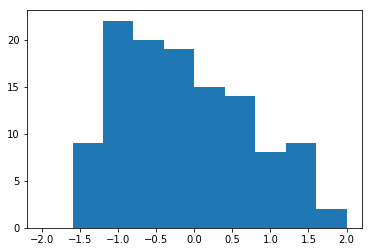

In [5]:
n, bins, patches = plt.hist(x=np.reshape(map_patch,-1),bins=10,range=[-2.0,2])

In [6]:
print(np.std(map_patch),np.mean(map_patch))

1.0000001 1.04904174e-07
